# The Sparks Foundation - GRIP
## Data Science & Business Analytics

# Task - 6   Prediction using Decision Tree Algorithm

## Create the Decision Tree classifier and visualize it graphically

### Created by: Jay Khade

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz


import warnings
warnings.filterwarnings("ignore")

# Data Reading & Understanding

In [2]:
# reading & understanding Data

iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# shape of the data
iris.shape

(150, 6)

**so, we have 150 observations in the dataset.**

In [4]:
# checking info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# checking for duplicates
iris.duplicated().sum()

0

**No duplicate values found.**

In [6]:
# checking for statastical summary
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**mean and median of all the features are colse to each other, we can say that data is not highly skewed.**

# EDA

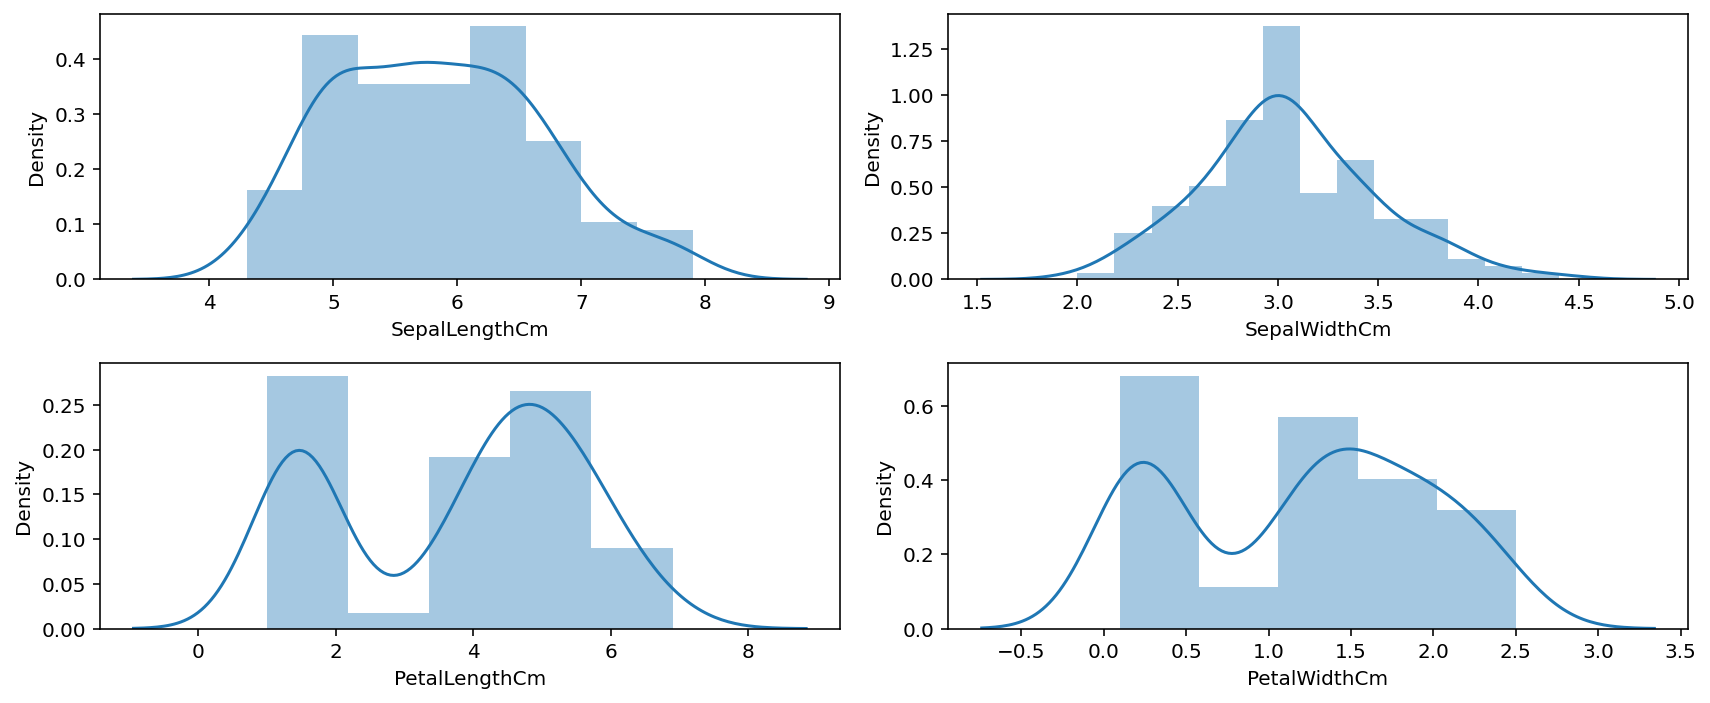

In [7]:
# checking for data distribution
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

plt.figure(figsize=(12,5))
for i in enumerate(cols):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(iris[i[1]])
plt.tight_layout()
plt.show()

**we can say that, data is not skewed. data is normaly distributed.**

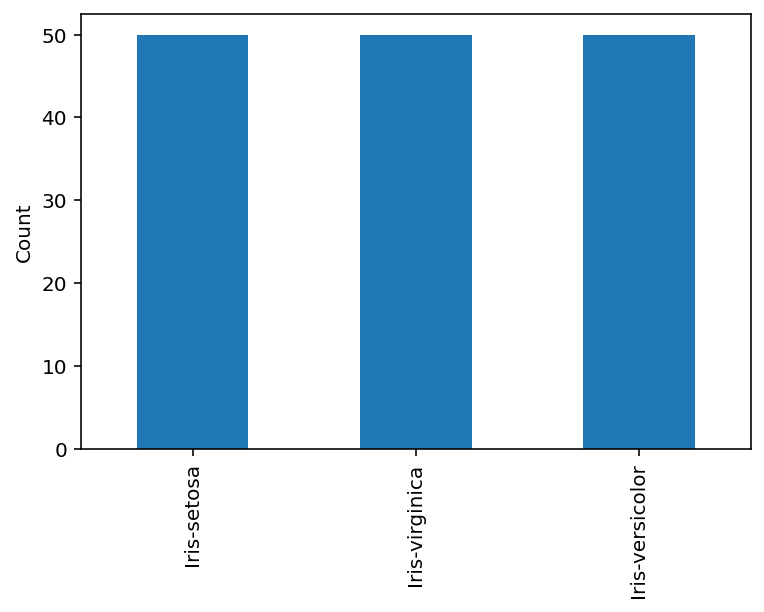

In [8]:
# checking target distibution

iris.Species.value_counts().plot(kind='bar')
plt.ylabel("Count")
plt.show()

**we have 3 classes in Target & there is no target imbalance**

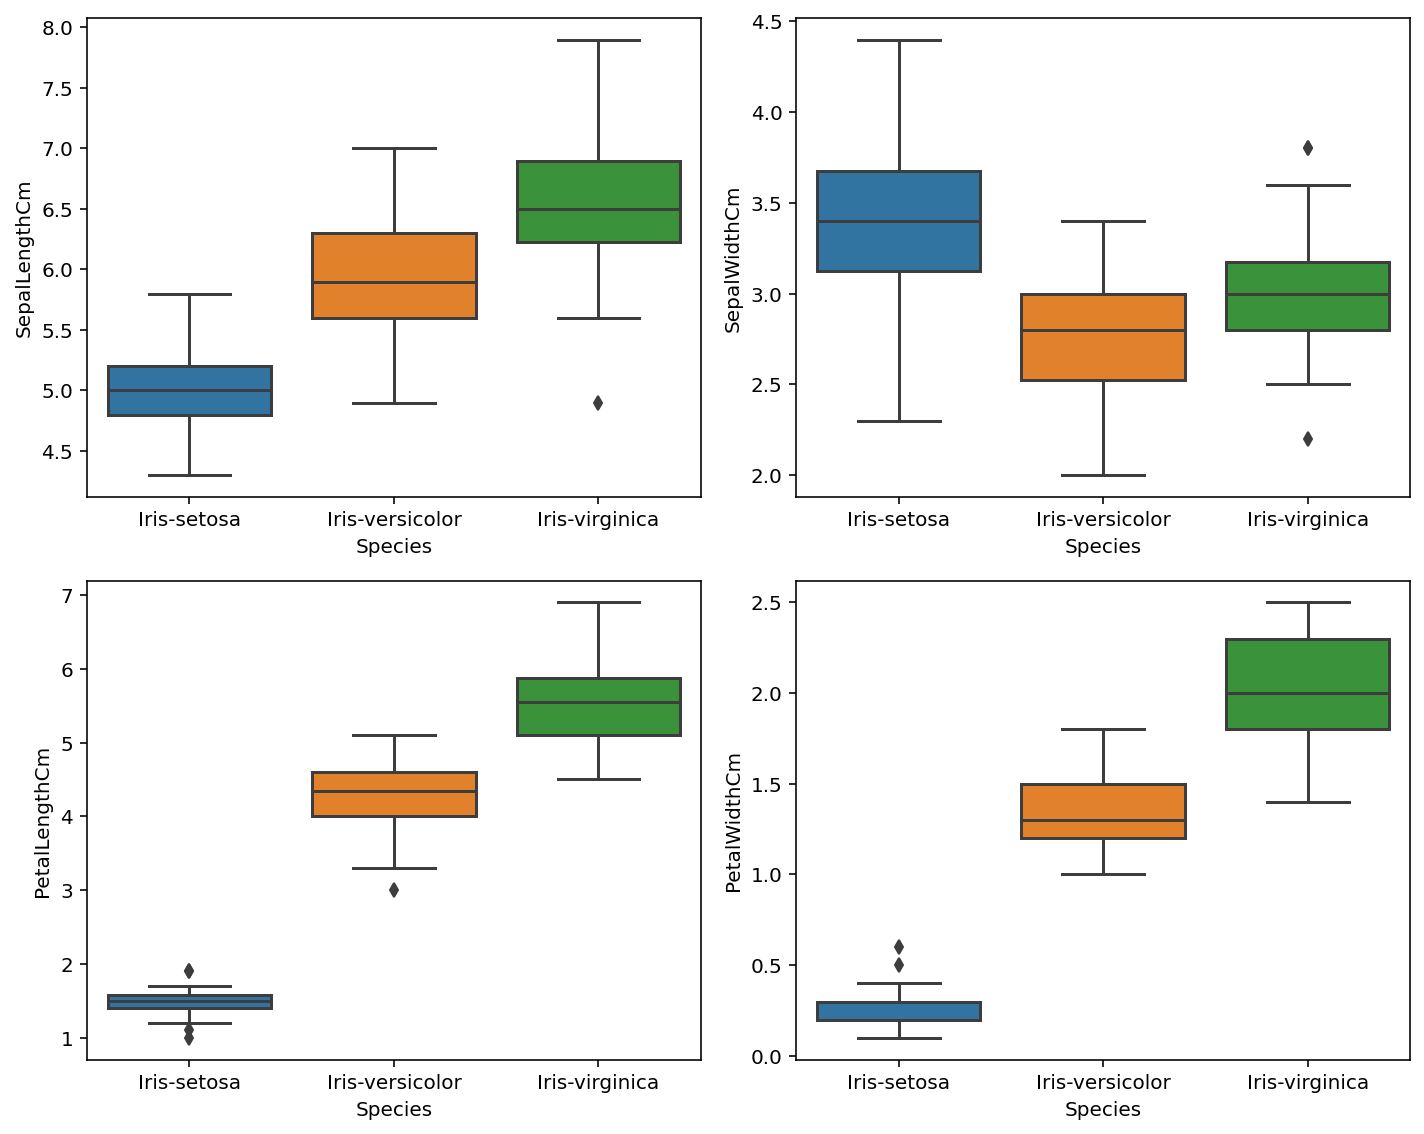

In [9]:
# checking for which features might help us in predection

plt.figure(figsize=(10,8))
for i in enumerate(cols):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(y=iris[i[1]], x=iris.Species)
plt.tight_layout()
plt.show()

**we can see here, all the features sepal length, sepal width, petal length, petal width are helping to classify the flowers. They have different different median values for all features.**

In [10]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']

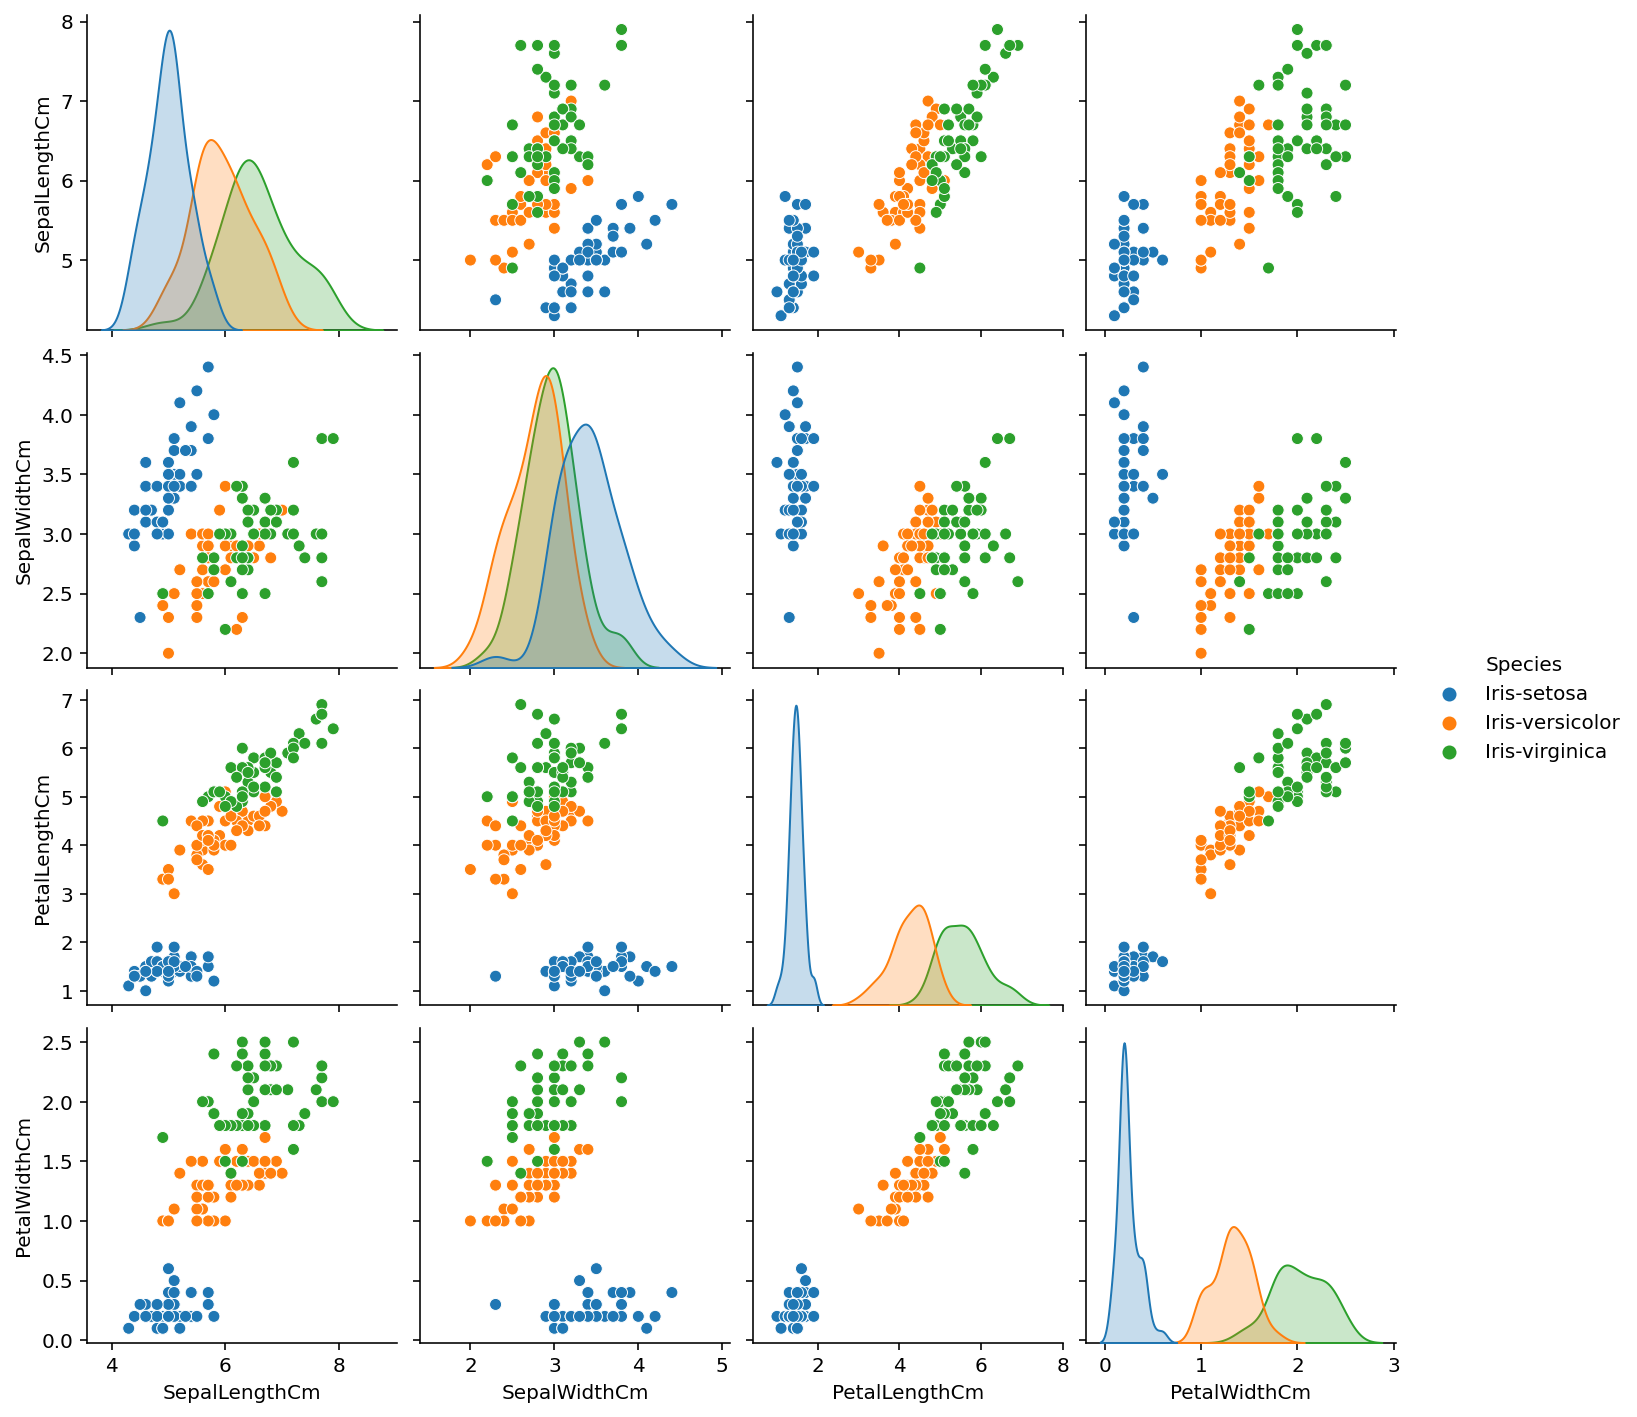

In [11]:
sns.pairplot(data = iris[cols], hue= "Species")

**we can see the seperation in distribuiton. Petal length and petal width shows maximum seperation. these features can hepl us in classification.**

# Missing Values

In [12]:
# lets check for missing values

iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**No missing Values Found.**

**we are using Decision tree for classification. The Advantage of using Decision tree is its high interpretability and it requires very less preprocessed data.**

**Decision tree is not sensitive towrds outliers, and does not requires normalization of the data. so lets directly split the data and feed it to the model.**

# Train-Test Split

In [13]:
X = iris.drop(["Species","Id"] , axis=1) # features
y = iris["Species"] # target

In [14]:
# splitting 70-30.
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7,
                                                    shuffle=True,stratify=y,
                                                    random_state = 42)

In [15]:
# shape of the train and test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

# Model Building - Decision Tree Classifier

## With no regularization

In [16]:
# decison tree with no regularization

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train) # model fitting on training data

DecisionTreeClassifier(random_state=42)

In [17]:
train_pred = dt.predict(X_train)

train_acc = accuracy_score(y_true=y_train, y_pred=train_pred)
print(f"Train Accuracy : {train_acc}")

Train Accuracy : 1.0


In [18]:
test_pred = dt.predict(X_test)

test_acc = accuracy_score(y_true=y_test, y_pred=test_pred)
print(f"Test Accuracy : {test_acc}")

Test Accuracy : 0.9333333333333333


**we can obseerve train accuracy is 1.0 and test accuracy is 0.93, we can observe slight overfitting here. we can do better.**

## With regularization

In [19]:
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train,y_train) # model fitting on training data

DecisionTreeClassifier(max_depth=3, random_state=42)

In [20]:
train_pred = dt.predict(X_train)

train_acc = accuracy_score(y_true=y_train, y_pred=train_pred)
print(f"Train Accuracy : {train_acc}")

Train Accuracy : 0.9809523809523809


In [21]:
# classification report
report = classification_report(y_true=y_train,y_pred=train_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       0.97      0.97      0.97        35
 Iris-virginica       0.97      0.97      0.97        35

       accuracy                           0.98       105
      macro avg       0.98      0.98      0.98       105
   weighted avg       0.98      0.98      0.98       105



In [22]:
test_pred = dt.predict(X_test)

test_acc = accuracy_score(y_true=y_test, y_pred=test_pred)
print(f"Test Accuracy : {test_acc}")

Test Accuracy : 0.9777777777777777


**After using maximum depth till 3 we got training accuracy of 98% and testing accuracy of 97.7%. It is far better than first case. Now model doesnt look overfit.**

# Decision Tree

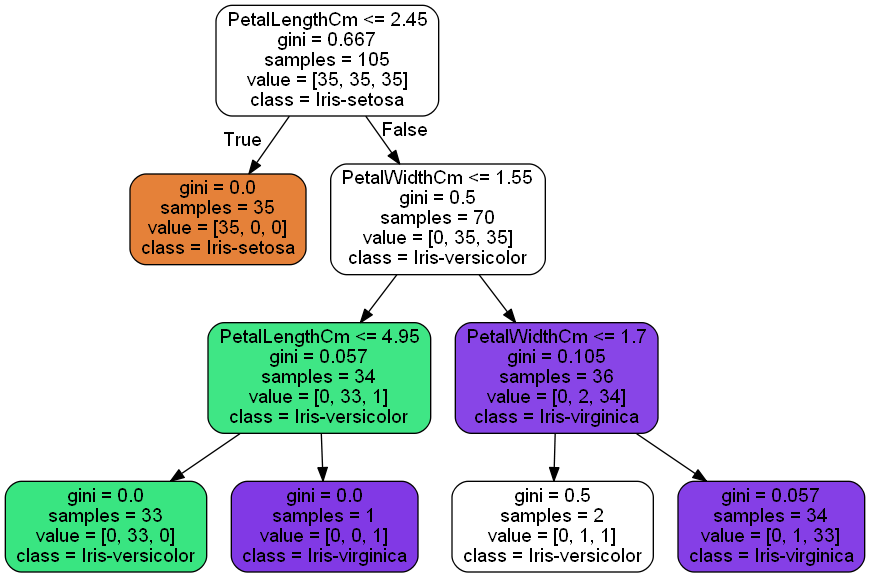

In [23]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns, 
                class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())